In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

#### Without applying Binning

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 2), (143, 2), (571,), (143,))

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6293706293706294

In [17]:
np.mean(cross_val_score(clf, X,y,scoring='accuracy', cv=10))

np.float64(0.6289123630672926)

#### Applying Binning

In [93]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [94]:
trf = ColumnTransformer([
    ('first', kbin_age,['Age']),
    ('second', kbin_fare,['Fare'])
])

In [95]:
trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 ['Age']),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 ['Fare'])])

In [57]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [96]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [61]:
trf.named_transformers_['first'].n_bins_

array([15])

In [62]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [63]:
output = pd.DataFrame({
    'age' : X_train['Age'],
    'trf_age':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'trf_fare':X_train_trf[:,1]
})

In [64]:
output.head()

,age,trf_age,fare,trf_fare
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [65]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [66]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[0.42,
 6.0,
 16.0,
 19.0,
 21.0,
 23.0,
 25.0,
 28.0,
 30.0,
 32.0,
 35.0,
 38.0,
 42.0,
 47.0,
 54.0,
 80.0]

In [67]:
output.head(5)

,age,trf_age,fare,trf_fare,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(19.0, 21.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(6.0, 16.0]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(16.0, 19.0]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(6.0, 16.0]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(6.0, 16.0]"


In [68]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [69]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [72]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [73]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(clf,X,y,scoring='accuracy', cv=10))

np.float64(0.6358959311424099)

In [ ]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [74]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [114]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age,['Age']),
        ('second', kbin_fare,['Fare'])
    ])
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    X_trf = trf.fit_transform(X)
    clf = DecisionTreeClassifier()
    print("CrossValidation Score: ",np.mean(cross_val_score(clf,X,y,scoring='accuracy', cv=10)))
    
    X_trf = pd.DataFrame(X_trf, columns=X_train.columns )

    #plot
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (14,4))
    fig, (ax3,ax4) = plt.subplots(ncols=2, figsize=(14,4))
    sns.histplot(X['Age'], ax=ax1)
    ax1.set_title('Before Transformation(Age)')
    sns.histplot(X['Fare'], ax=ax3)
    ax3.set_title('Before Transformation(Fare)')

    sns.histplot(X_trf['Age'], ax=ax2)
    ax2.set_title('After Transformation(Age)')
    sns.histplot(X_trf['Fare'], ax=ax4)
    ax4.set_title('After Transformation(Fare)')
    plt.tight_layout()
    plt.show()


CrossValidation Score:  0.6288928012519561


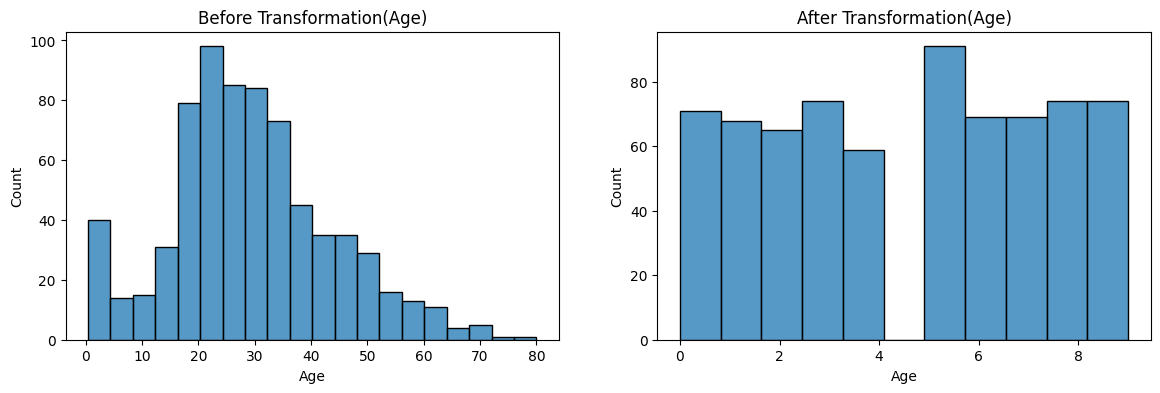

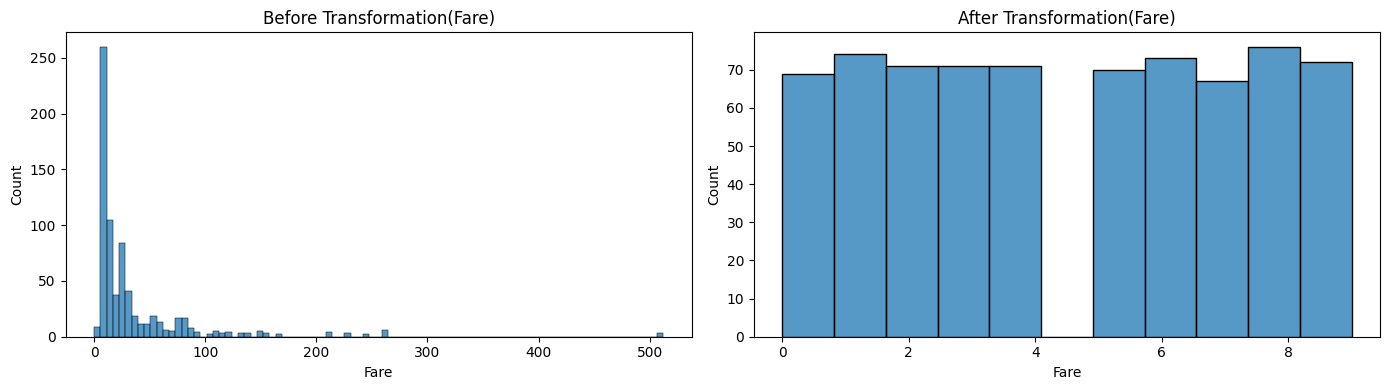

In [115]:
discretize(10,'quantile')

CrossValidation Score:  0.6330985915492957


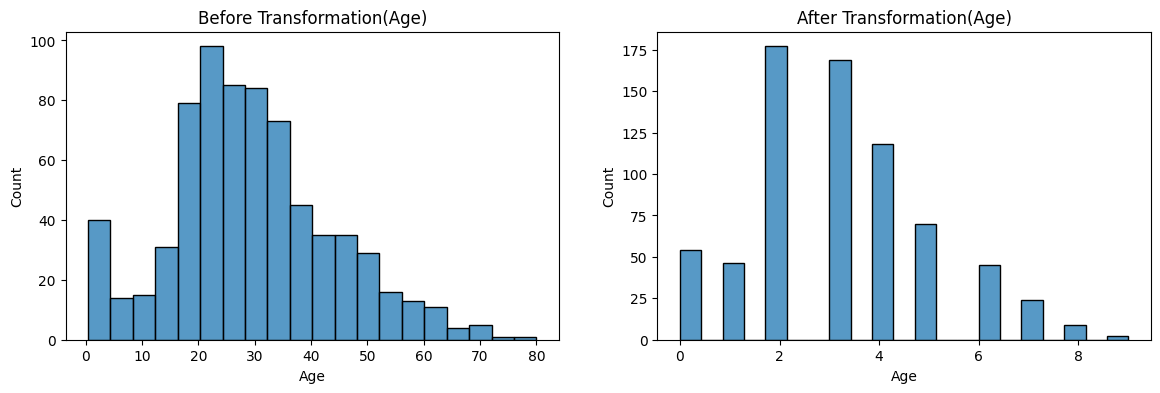

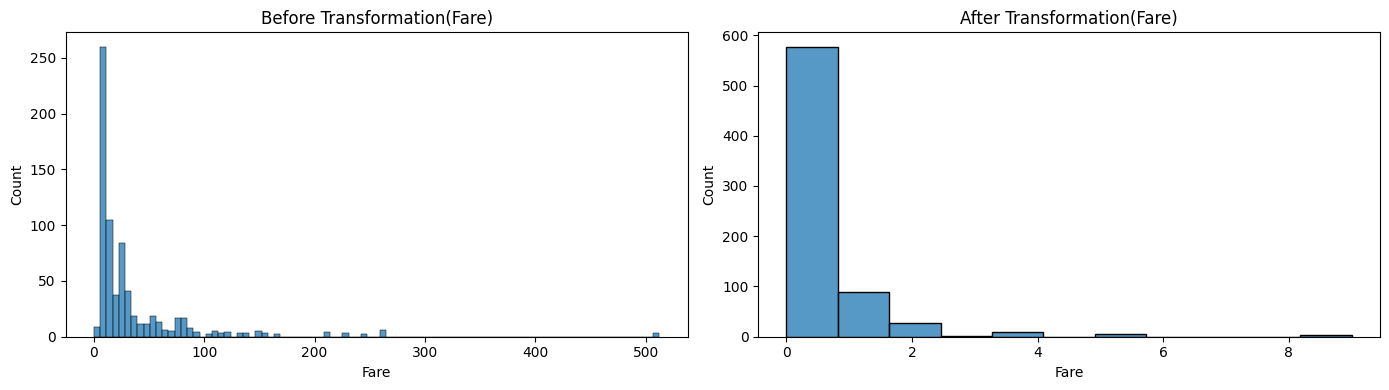

In [116]:
discretize(10, 'uniform')

CrossValidation Score:  0.6372848200312988


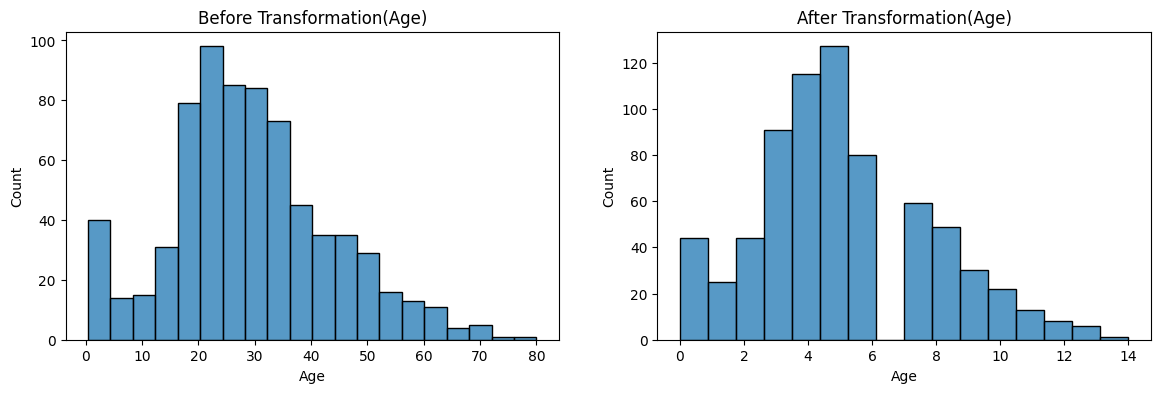

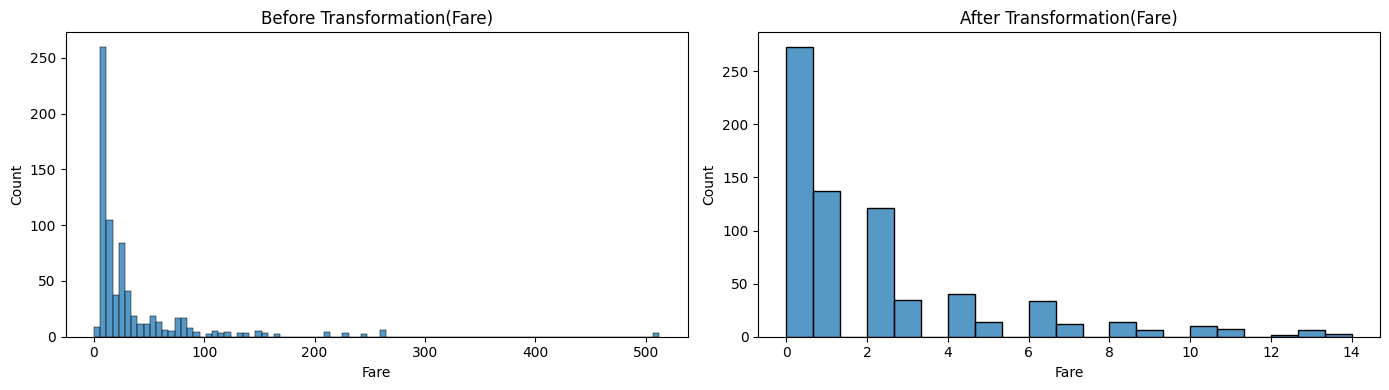

In [118]:
discretize(15,'kmeans')

#### Binarization

In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [155]:
df = pd.read_csv('train.csv')[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [156]:
df.isnull().sum()

Age         177
Fare          0
SibSp         0
Parch         0
Survived      0
dtype: int64

In [157]:
df.shape

(891, 5)

In [158]:
df.dropna(inplace=True)

In [159]:
df.shape

(714, 5)

In [160]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [161]:
df['Family'] = df['Parch'] + df['SibSp']
df.head()
#df.drop(columns=['SibSp','Parch'], inplace=True)

,Age,Fare,SibSp,Parch,Survived,Family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [162]:
df.drop(columns=['SibSp','Parch'], inplace=True)
df.shape

(714, 4)

In [163]:
df.head()

,Age,Fare,Survived,Family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [166]:
X= df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 3), (143, 3), (571,), (143,))

In [168]:
X_train.head()

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


##### Without Binarization

In [169]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6223776223776224

In [170]:
np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=10))

np.float64(0.6541666666666668)

##### Applying Binarization

In [171]:
from sklearn.preprocessing import Binarizer

In [172]:
#copy false, means I want change in existing column, here it is Family column
trf = ColumnTransformer([
    ('bin', Binarizer(copy=False),['Family'])
], remainder='passthrough')

In [173]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [174]:
pd.DataFrame(X_train_trf, columns=['family', 'Age', 'fare'])

,family,Age,fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [176]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred = clf.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.6013986013986014

In [177]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(clf,X,y,scoring='accuracy', cv=10))

np.float64(0.6555164319248826)